In [1]:
import numpy as np
import matplotlib.pyplot as plt

import imageio.v2 as imageio
from skimage.color import rgb2gray
from skimage import filters
from skimage.morphology import disk
from skimage.filters import rank
from skimage.exposure import rescale_intensity
from skimage.transform import resize

In [2]:
def float_to_int(image):
    image = image * 255
    return image.astype(np.uint8)

In [3]:
def preprocessing(original_image):

    img = imageio.imread(original_image)
    denoised = filters.median(img)
    contrast_enhanced = rescale_intensity(denoised)
    contrast_enhanced = float_to_int(resize(contrast_enhanced, (256, 256)))

    return contrast_enhanced

In [4]:
def region_segmentation(img):
    gray = rgb2gray(img)

    gradient = rank.gradient(gray, disk(5))

    gradient_filtered = np.copy(gradient)
    gradient_filtered[gradient > 128] = 255
    gradient_filtered[gradient <= 128] = 0

    return gradient_filtered

In [5]:
def segment_image(img):
    region = region_segmentation(img)

    final = np.ones((img.shape[0], img.shape[1]))
    final[region != 255] = 0
    return final

In [6]:
def visualise_semantic(original, preprocessed, final):
    plt.figure(figsize=(18,9), dpi=80)
   
    plt.subplot(131)
    plt.title("Original")
    plt.imshow(imageio.imread(original))

    plt.subplot(132)
    plt.title("preprocessed")
    plt.imshow(preprocessed)

    plt.subplot(133)
    plt.title("Final")
    plt.imshow(final, cmap=plt.cm.gray)

In [10]:
def formal_classification(final_img):
    info = np.round(np.count_nonzero(final_img == 1) / (256*256), 3)

    print(f"Информативность снимка: {np.count_nonzero(final_img == 1)}/{256*256}, {info * 100}%")
    
    """Критерий оценки информативности формальный"""
    if info <= 0.25:
        print('Bad')
    elif info <= 0.5:
        print('Well')
    elif info <= 0.75:
        print('Good')
    else:
        print('Excellent')

C:\Users\B72A~1\AppData\Local\Temp/ipykernel_15828/2858698891.py:2: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  region = region_segmentation(img)


Информативность снимка: 28645/65536, 43.7%
Well


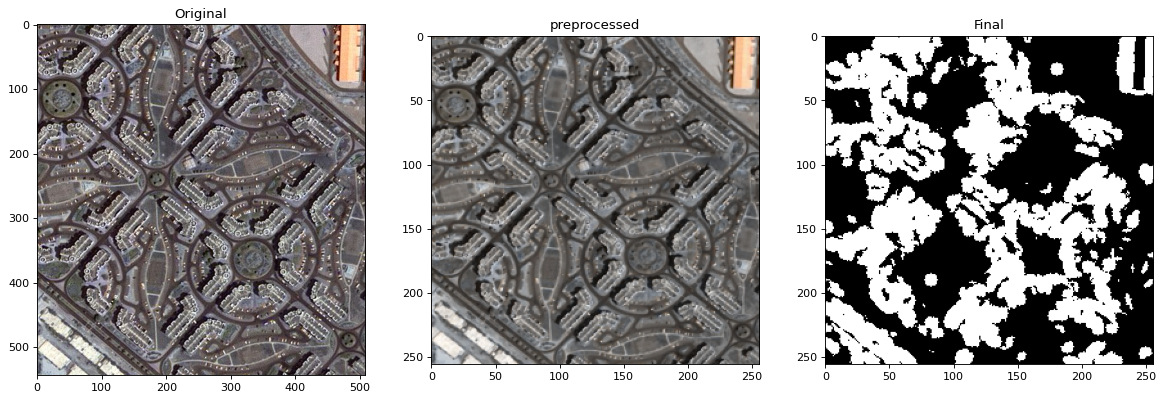

In [11]:
def main():
    original_img = 'test_img.jpg'
    
    preprocessed_img = preprocessing(original_img)

    semantic_segmentation = segment_image(preprocessed_img)
    
    formal_classification(semantic_segmentation)

    visualise_semantic(original_img, preprocessed_img, semantic_segmentation)

if __name__ == "__main__":
    main()